<a href="https://colab.research.google.com/github/SudanshuKhullar/-Human-vs-ML-Sentiment-Analysis-Challenge/blob/main/Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create an interactive Human vs ML sentiment analysis challenge using the IMDb dataset, where users predict the sentiment of movie reviews and compare their accuracy against a trained machine learning model.

## Load and explore the dataset

### Subtask:
Load the IMDb dataset and explore its structure, including the reviews and their corresponding sentiment labels.


**Reasoning**:
Load the IMDb dataset using tensorflow_datasets, display the first few rows, check data types, shape, missing values, and sentiment distribution.



In [18]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

# Load the IMDb dataset
ds = tfds.load('imdb_reviews', split='train', as_supervised=True)

# Convert to pandas DataFrame for easier exploration
df = tfds.as_dataframe(ds)

# Rename columns for clarity
df.rename(columns={0: 'review', 1: 'sentiment'}, inplace=True)

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Check data types
print("\nData types:")
display(df.info())

# Get the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Examine the distribution of sentiment labels
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.K2XVZF_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.K2XVZF_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.K2XVZF_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


TypeError: sequence item 0: expected str instance, int found

**Reasoning**:
The previous attempt to convert the dataset to a pandas DataFrame failed. I will try a different approach to convert the dataset to a pandas DataFrame by iterating through the dataset and creating lists for reviews and sentiments, then creating the DataFrame from these lists.



In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

# Load the IMDb dataset
ds = tfds.load('imdb_reviews', split='train', as_supervised=True)

# Extract data into lists
reviews = []
sentiments = []
for review, sentiment in ds.take(-1):  # Take all elements
    reviews.append(review.numpy().decode('utf-8'))
    sentiments.append(sentiment.numpy())

# Create a pandas DataFrame
df = pd.DataFrame({'review': reviews, 'sentiment': sentiments})

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Check data types
print("\nData types:")
display(df.info())

# Get the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Examine the distribution of sentiment labels
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

KeyboardInterrupt: 

In [20]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # To read the uploaded file into a pandas DataFrame (assuming it's a CSV)
  # You might need to adjust this based on the file type
  try:
    df_uploaded = pd.read_csv(fn)
    print("\nContent of the uploaded file:")
    display(df_uploaded.head())
  except Exception as e:
    print(f"Error reading file: {e}")

Saving archive (1).zip to archive (1).zip
User uploaded file "archive (1).zip" with length 26962657 bytes

Content of the uploaded file:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [21]:
# Display the first few rows
print("First 5 rows of the dataset:")
display(df_uploaded.head())

# Check data types
print("\nData types:")
display(df_uploaded.info())

# Get the shape of the dataset
print("\nShape of the dataset:")
print(df_uploaded.shape)

# Check for missing values
print("\nMissing values:")
print(df_uploaded.isnull().sum())

# Examine the distribution of sentiment labels
print("\nSentiment distribution:")
print(df_uploaded['sentiment'].value_counts())

First 5 rows of the dataset:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


None


Shape of the dataset:
(50000, 2)

Missing values:
review       0
sentiment    0
dtype: int64

Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [22]:
import re
import string

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # You can add more preprocessing steps here like removing stopwords, stemming, etc.
    return text

df_uploaded['cleaned_review'] = df_uploaded['review'].apply(preprocess_text)

print("Original review:")
print(df_uploaded['review'][0])
print("\nCleaned review:")
print(df_uploaded['cleaned_review'][0])

Original review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# You can adjust parameters like max_features, min_df, max_df, ngram_range
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8)

# Fit and transform the cleaned reviews
X = tfidf_vectorizer.fit_transform(df_uploaded['cleaned_review'])

# Display the shape of the resulting feature matrix
print("Shape of the TF-IDF feature matrix:")
print(X.shape)

# Display the first few rows of the feature matrix (as it's a sparse matrix, we convert to array for display)
# Note: Displaying the full sparse matrix can be memory intensive for large datasets
# print("\nFirst 5 rows of the TF-IDF feature matrix:")
# display(X[:5].toarray())

Shape of the TF-IDF feature matrix:
(50000, 5000)


In [24]:
# Select a random subset of the data for human predictions
# You can adjust the sample size as needed
human_challenge_df = df_uploaded.sample(n=20, random_state=42) # Using a random state for reproducibility

print("Subset of data for human challenge:")
display(human_challenge_df[['review', 'sentiment']].head())
print("\nShape of the human challenge subset:")
print(human_challenge_df.shape)

Subset of data for human challenge:


,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative



Shape of the human challenge subset:
(20, 3)


In [25]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# X is the TF-IDF feature matrix we created earlier
y = df_uploaded['sentiment'] # The sentiment labels are our target

# Convert sentiment labels to numerical format (0 for negative, 1 for positive)
y = y.apply(lambda x: 1 if x == 'positive' else 0)

# Split data into training and testing sets
# We will use the full dataset (df_uploaded) for training the model,
# not just the human challenge subset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)

Shape of training features (X_train): (40000, 5000)
Shape of testing features (X_test): (10000, 5000)
Shape of training labels (y_train): (40000,)
Shape of testing labels (y_test): (10000,)


In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Model Accuracy: 0.8921

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:
[[4423  577]
 [ 502 4498]]


In [28]:
display(human_challenge_df[['review']].head())

,review
33553,I really liked this Summerslam due to the look...
9427,Not many television shows appeal to quite as m...
199,The film quickly gets to a major chase scene w...
12447,Jane Austen would definitely approve of this o...
39489,Expectations were somewhat high for me when I ...


In [29]:
human_predictions = []

print("Please enter your sentiment prediction for each review (positive or negative):")

# Iterate through the reviews in the human challenge subset
for index, row in human_challenge_df.iterrows():
    review = row['review']
    print(f"\nReview {index}:")
    print(review)

    # Get human prediction input
    while True:
        user_prediction = input("Your prediction (positive/negative): ").lower().strip()
        if user_prediction in ['positive', 'negative']:
            human_predictions.append(user_prediction)
            break
        else:
            print("Invalid input. Please enter 'positive' or 'negative'.")

print("\nHuman predictions collected.")

Please enter your sentiment prediction for each review (positive or negative):

Review 33553:
I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smok

In [30]:
# Preprocess the reviews in the human challenge subset using the same vectorizer
X_human_challenge = tfidf_vectorizer.transform(human_challenge_df['cleaned_review'])

# Get ML model predictions for the human challenge subset
ml_predictions_numeric = model.predict(X_human_challenge)

# Convert the numerical predictions back to 'positive'/'negative' labels
ml_predictions = ['positive' if pred == 1 else 'negative' for pred in ml_predictions_numeric]

print("ML model predictions collected.")

ML model predictions collected.


In [31]:
# Get the actual sentiment labels for the human challenge subset
actual_sentiments = human_challenge_df['sentiment'].tolist()

# Compare human predictions to actual sentiments
human_correct_count = sum(1 for hp, actual in zip(human_predictions, actual_sentiments) if hp == actual)
human_accuracy = human_correct_count / len(actual_sentiments) if actual_sentiments else 0

# Compare ML predictions to actual sentiments
ml_correct_count = sum(1 for mlp, actual in zip(ml_predictions, actual_sentiments) if mlp == actual)
ml_accuracy = ml_correct_count / len(actual_sentiments) if actual_sentiments else 0

print(f"Human Accuracy: {human_accuracy:.4f}")
print(f"ML Model Accuracy: {ml_accuracy:.4f}")

# Optionally, display a comparison of predictions
comparison_df = human_challenge_df[['review', 'sentiment']].copy()
comparison_df['human_prediction'] = human_predictions
comparison_df['ml_prediction'] = ml_predictions
comparison_df['human_correct'] = (comparison_df['human_prediction'] == comparison_df['sentiment'])
comparison_df['ml_correct'] = (comparison_df['ml_prediction'] == comparison_df['sentiment'])

print("\nComparison of Predictions:")
display(comparison_df)

Human Accuracy: 0.8000
ML Model Accuracy: 0.9500

Comparison of Predictions:


,review,sentiment,human_prediction,ml_prediction,human_correct,ml_correct
33553,I really liked this Summerslam due to the look...,positive,positive,negative,True,False
9427,Not many television shows appeal to quite as m...,positive,positive,positive,True,True
199,The film quickly gets to a major chase scene w...,negative,negative,negative,True,True
12447,Jane Austen would definitely approve of this o...,positive,negative,positive,False,True
39489,Expectations were somewhat high for me when I ...,negative,negative,negative,True,True
42724,I've watched this movie on a fairly regular ba...,positive,positive,positive,True,True
10822,For once a story of hope highlighted over the ...,positive,positive,positive,True,True
49498,"Okay, I didn't get the Purgatory thing the fir...",positive,positive,positive,True,True
4144,I was very disappointed with this series. It h...,negative,negative,negative,True,True
36958,The first 30 minutes of Tinseltown had my fing...,negative,positive,negative,False,True


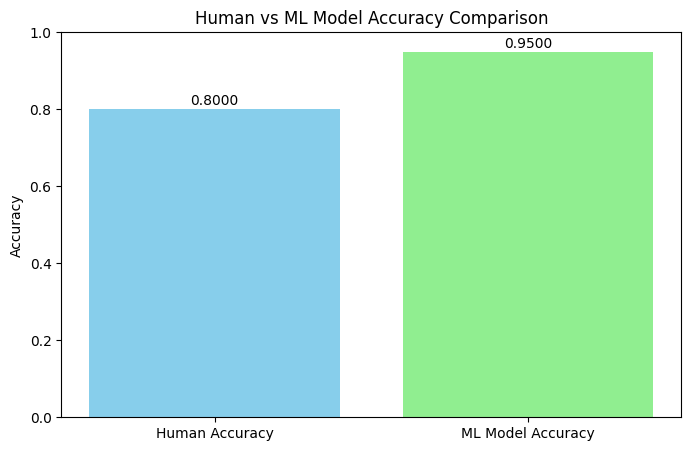

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values
accuracies = [human_accuracy, ml_accuracy]
labels = ['Human Accuracy', 'ML Model Accuracy']

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Human vs ML Model Accuracy Comparison')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy

# Add text labels on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.show()

In [47]:
%%writefile game.py

import streamlit as st
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import random
import pickle
import matplotlib.pyplot as plt # Import matplotlib for the chart

# --- Custom CSS for Styling ---
custom_css = """
<style>
body {
    background-color: #000; /* Black background */
    color: #fff; /* White text for contrast */
    font-family: 'Segoe UI', Roboto, Arial, sans-serif;
}
.stApp {
    background-color: #000; /* Ensure the main app area also has the background */
    color: #fff; /* White text for contrast */
}
.stButton>button {
    background-color: #4CAF50; /* Green button */
    color: white;
    padding: 10px 20px;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    font-size: 16px;
    margin: 4px 2px;
    cursor: pointer;
    border: none;
    border-radius: 5px;
    transition: background-color 0.3s ease;
}
.stButton>button:hover {
    background-color: #45a049; /* Darker green on hover */
}
.stRadio > label > div {
    font-size: 16px;
    margin-right: 15px;
}
.stAlert {
    border-radius: 5px;
    padding: 10px;
}
.stAlert.success {
    background-color: #d4edda;
    color: #155724;
    border-color: #c3e6cb;
}
.stAlert.error {
    background-color: #f8d7da;
    color: #721c24;
    border-color: #f5c6cb;
}
.stMetric > div > div:first-child {
    font-size: 18px;
    color: #bbb; /* Lighter grey for metric labels */
}
.stMetric > div > div:last-child {
    font-size: 30px;
    font-weight: bold;
    color: #fff; /* White for metric values */
}
h1, h2, h3, h4, h5, h6 {
    color: #00b0f0; /* A brighter color for headings on black background */
}
/* Style for the info box displaying the review */
.stAlert.info {
    background-color: #333; /* Dark grey for review box */
    color: #eee; /* Light grey text */
    border-color: #555;
    font-style: italic;
}
</style>
"""

# --- Helper Functions ---

def preprocess_text(text):
    """Cleans the input text."""
    text = re.sub(r'<.*?>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

# --- Load Data and Train Model (replace with loading saved model in a real app) ---
# In a real deployment, you would load a pre-trained model and vectorizer
# to keep the app fast. For demonstration, we'll include training here.

@st.cache_resource
def load_and_train_model():
    """Loads data and trains the model."""
    # Load the dataset (assuming 'archive (1).zip' was uploaded and is accessible)
    # In a deployed app, you would load the data from a more reliable source
    try:
        # Adjust the path if your file is located elsewhere
        df = pd.read_csv('archive (1).zip')
    except FileNotFoundError:
        st.error("Dataset file not found. Please make sure 'archive (1).zip' is in the same directory or update the path.")
        return None, None, None

    # Check if the expected columns exist after loading
    if 'review' not in df.columns or 'sentiment' not in df.columns:
         # Assuming the columns might be unnamed and in position 0 and 1
         if df.shape[1] >= 2:
             df.rename(columns={df.columns[0]: 'review', df.columns[1]: 'sentiment'}, inplace=True)
         else:
            st.error("Dataset does not contain 'review' and 'sentiment' columns. Please check your CSV file.")
            return None, None, None


    df['cleaned_review'] = df['review'].apply(preprocess_text)
    # Ensure sentiment column is treated as string before applying lower()
    df['sentiment'] = df['sentiment'].astype(str).str.lower()
    y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


    # Train TF-IDF Vectorizer (fit on the entire dataset)
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8)
    X = tfidf_vectorizer.fit_transform(df['cleaned_review'])

    # Train Logistic Regression Model
    model = LogisticRegression(max_iter=1000)
    model.fit(X, y)

    return model, tfidf_vectorizer, df

model, tfidf_vectorizer, df = load_and_train_model()

if model is not None:
    # --- Streamlit App ---

    st.set_page_config(page_title="Human vs ML Sentiment Challenge", layout="wide")

    # Apply custom CSS
    st.markdown(custom_css, unsafe_allow_html=True)

    st.title("🎬 Human vs ML Sentiment Analysis Challenge")

    st.markdown("""
    Welcome to the challenge! Can your sentiment analysis skills beat our trained machine learning model?

    Read the movie review below and predict if the sentiment is **Positive** or **Negative**.
    Then, submit your prediction to see the ML model's result and the actual sentiment!
    """, unsafe_allow_html=True)

    st.markdown("---")

    # --- Sidebar ---
    st.sidebar.header("About the Challenge")
    st.sidebar.markdown("""
    This interactive application allows you to challenge a machine learning model in predicting the sentiment of movie reviews from the IMDb dataset.

    *   **Your Goal:** Correctly classify the sentiment (positive or negative) of each review.
    *   **ML Model's Goal:** Predict the sentiment using a trained Logistic Regression model.
    *   **Compare:** See how your accuracy stacks up against the model's!
    """)

    # Use an expander for the history section
    with st.sidebar.expander("Challenge History"):
        if 'human_predictions' in st.session_state and st.session_state.human_predictions:
            for i in range(len(st.session_state.human_predictions)):
                review_num = i + 1
                human_pred = st.session_state.human_predictions[i]
                ml_pred = st.session_state.ml_predictions[i]
                actual = st.session_state.actual_sentiments[i]

                human_correct_icon = "✅" if human_pred.lower() == actual.lower() else "❌"
                ml_correct_icon = "✅" if ml_pred.lower() == actual.lower() else "❌"

                st.markdown(f"**Review {review_num}:** You {human_correct_icon}, ML {ml_correct_icon}")
        else:
            st.info("Make your first prediction to see history here!")

    st.sidebar.subheader("Model Details")
    st.sidebar.markdown("""
    *   **Type:** Logistic Regression
    *   **Trained on:** 50,000 IMDb movie reviews
    *   **Features:** TF-IDF Vectorization (Top 5000 features)
    """)


    # --- Select a review for the challenge ---
    if 'challenge_reviews' not in st.session_state or 'current_review_index' not in st.session_state:
        # Ensure df is not None before sampling
        if df is not None:
            st.session_state.challenge_reviews = df.sample(n=10, random_state=random.randint(0,10000)).to_dict('records') # Select 10 random reviews
            st.session_state.current_review_index = 0
            st.session_state.human_predictions = []
            st.session_state.ml_predictions = []
            st.session_state.actual_sentiments = []
        else:
             st.error("Could not load dataset to start the challenge.")


    if 'challenge_reviews' in st.session_state and len(st.session_state.challenge_reviews) > 0:
        current_review_data = st.session_state.challenge_reviews[st.session_state.current_review_index]
        current_review = current_review_data['review']
        actual_sentiment = current_review_data['sentiment']

        st.subheader(f"Challenge Review {st.session_state.current_review_index + 1} of {len(st.session_state.challenge_reviews)}")
        st.info(current_review) # Use st.info for a distinct look

        # Display current human score (outside sidebar for prominence)
        current_human_correct = sum(1 for hp, actual in zip(st.session_state.human_predictions, st.session_state.actual_sentiments) if hp.lower() == actual.lower())
        st.write(f"Your current score: **{current_human_correct} / {st.session_state.current_review_index}** correct predictions")


        # --- Human Prediction ---
        st.markdown("### Your Prediction")
        human_prediction = st.radio("Choose the sentiment:", ('Positive', 'Negative'), key=f"human_pred_{st.session_state.current_review_index}", horizontal=True)

        # --- Make and show ML Prediction (only after human predicts) ---
        if st.button("Submit Prediction and See ML Result", key=f"submit_btn_{st.session_state.current_review_index}"):
            # Get ML prediction
            cleaned_review = preprocess_text(current_review)
            X_single = tfidf_vectorizer.transform([cleaned_review])
            ml_prediction_numeric = model.predict(X_single)[0]
            ml_prediction = 'Positive' if ml_prediction_numeric == 1 else 'Negative'

            # Store results
            st.session_state.human_predictions.append(human_prediction)
            st.session_state.ml_predictions.append(ml_prediction)
            st.session_state.actual_sentiments.append(actual_sentiment)

            # Display results for the current review in columns
            st.markdown("---")
            st.subheader("Results for this Review")

            col1, col2, col3 = st.columns(3)

            with col1:
                st.write(f"**Your Prediction:**")
                if human_prediction.lower() == actual_sentiment.lower():
                     st.success(human_prediction)
                else:
                     st.error(human_prediction)


            with col2:
                st.write(f"**ML Model Prediction:**")
                if ml_prediction.lower() == actual_sentiment.lower():
                    st.success(ml_prediction)
                else:
                    st.error(ml_prediction)

            with col3:
                 st.write(f"**Actual Sentiment:**")
                 st.write(actual_sentiment.capitalize())


            st.markdown("---")

            # Move to the next review or finish
            if st.session_state.current_review_index < len(st.session_state.challenge_reviews) - 1:
                st.session_state.current_review_index += 1
                # Add a button to go to the next review
                st.button("Next Review", key=f"next_btn_{st.session_state.current_review_index}", on_click=st.rerun)
            else:
                st.subheader("Challenge Complete!")
                st.write("You have finished all the reviews in this challenge.")

                # Calculate and display final scores
                human_correct_count = sum(1 for hp, actual in zip(st.session_state.human_predictions, st.session_state.actual_sentiments) if hp.lower() == actual.lower())
                ml_correct_count = sum(1 for mlp, actual in zip(st.session_state.ml_predictions, st.session_state.actual_sentiments) if mlp.lower() == actual.lower())
                total_reviews = len(st.session_state.challenge_reviews)

                human_accuracy = (human_correct_count / total_reviews) * 100 if total_reviews > 0 else 0
                ml_accuracy = (ml_correct_count / total_reviews) * 100 if total_reviews > 0 else 0

                st.subheader("Final Scores")

                score_col1, score_col2 = st.columns(2)
                with score_col1:
                    st.metric("Your Accuracy", f"{human_accuracy:.2f}%")
                with score_col2:
                    st.metric("ML Model Accuracy", f"{ml_accuracy:.2f}%")

                # Display accuracy comparison chart (Pie Chart)
                accuracies = [human_accuracy, ml_accuracy]
                labels = ['Your Accuracy', 'ML Model Accuracy']

                # Create pie chart
                fig, ax = plt.subplots(figsize=(6, 6)) # Reduced size
                ax.pie(accuracies, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
                ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
                ax.set_title('Human vs ML Model Accuracy Comparison')

                st.pyplot(fig)


                # Display comparison table
                # Check if the lengths match before creating the DataFrame
                if len(st.session_state.human_predictions) == len(st.session_state.challenge_reviews):
                    comparison_data = {
                        'Review': [r['review'] for r in st.session_state.challenge_reviews],
                        'Actual Sentiment': st.session_state.actual_sentiments,
                        'Your Prediction': st.session_state.human_predictions,
                        'ML Prediction': st.session_state.ml_predictions,
                        'You Correct': [hp.lower() == actual.lower() for hp, actual in zip(st.session_state.human_predictions, st.session_state.actual_sentiments)],
                        'ML Correct': [mlp.lower() == actual.lower() for mlp, actual in zip(st.session_state.ml_predictions, st.session_state.actual_sentiments)]
                    }
                    comparison_df = pd.DataFrame(comparison_data)
                    st.subheader("Detailed Comparison")
                    st.dataframe(comparison_df)
                else:
                    st.warning("Cannot display detailed comparison until all reviews are completed.")


                # Option to start a new challenge
                st.markdown("---")
                if st.button("Start New Challenge"):
                    # Ensure df is not None before sampling
                    if df is not None:
                        st.session_state.challenge_reviews = df.sample(n=10, random_state=random.randint(0,10000)).to_dict('records')
                        st.session_state.current_review_index = 0
                        st.session_state.human_predictions = []
                        st.session_state.ml_predictions = []
                        st.session_state.actual_sentiments = []
                        st.rerun()
                    else:
                        st.error("Could not load dataset to start a new challenge.")
    elif 'challenge_reviews' in st.session_state and len(st.session_state.challenge_reviews) == 0:
        st.warning("No reviews loaded for the challenge. Please check the dataset.")

    # --- Add a Section for User to Analyze Their Own Text ---
    st.markdown("---")
    st.subheader("Analyze Your Own Review")
    st.write("Want to see what the ML model predicts for a review of your choice? Paste your text below!")

    user_text = st.text_area("Enter your movie review here:", height=150)

    if st.button("Get ML Sentiment Prediction for Your Text"):
        if user_text:
            # Preprocess the user's text
            cleaned_user_text = preprocess_text(user_text)
            X_user_text = tfidf_vectorizer.transform([cleaned_user_text])

            # Get ML prediction
            user_ml_prediction_numeric = model.predict(X_user_text)[0]
            user_ml_prediction = 'Positive' if user_ml_prediction_numeric == 1 else 'Negative'

            st.markdown("---")
            st.subheader("ML Model Prediction for Your Text")
            if user_ml_prediction == 'Positive':
                st.success(f"The ML model predicts: **{user_ml_prediction}**")
            else:
                st.error(f"The ML model predicts: **{user_ml_prediction}**")
        else:
            st.warning("Please enter some text to get a prediction.")

Overwriting game.py


In [39]:
%%writefile requirements.txt
streamlit
pandas
numpy
scikit-learn
matplotlib

Writing requirements.txt
